In [ ]:
import anndata as ad
import custom_func as pc 
import color_map as cc
import pandas as pd

### OPEN ANNDATA FILE

In [2]:
path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)

In [3]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'centered_study_log_small', 'small_reduction'
    layers: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'not_normalized'

### NO PREPROCESSING 

In [4]:
not_norm_df = pd.DataFrame(data=adata.layers['not_normalized'], columns=adata.var.index, index=adata.obs['time'])

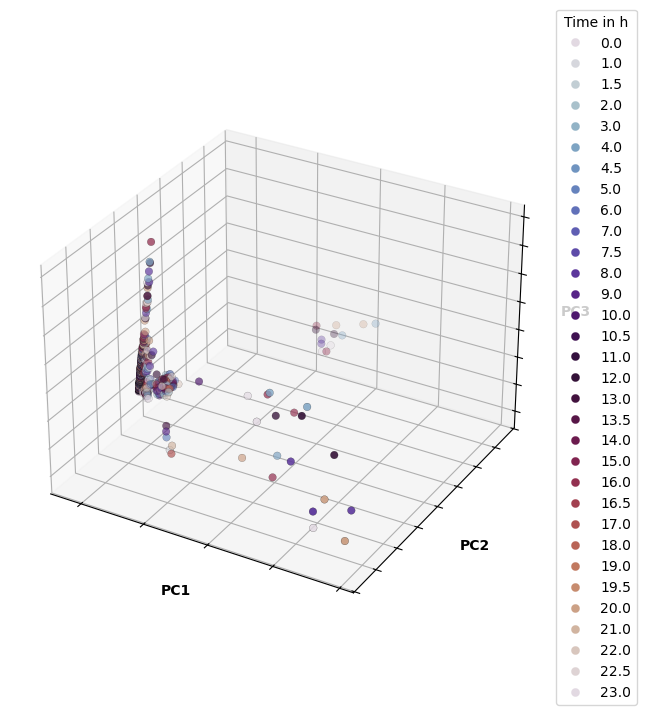

In [5]:
pc.principal_component_3d_timesample(data=not_norm_df, label='Time in h',c_map='twilight')

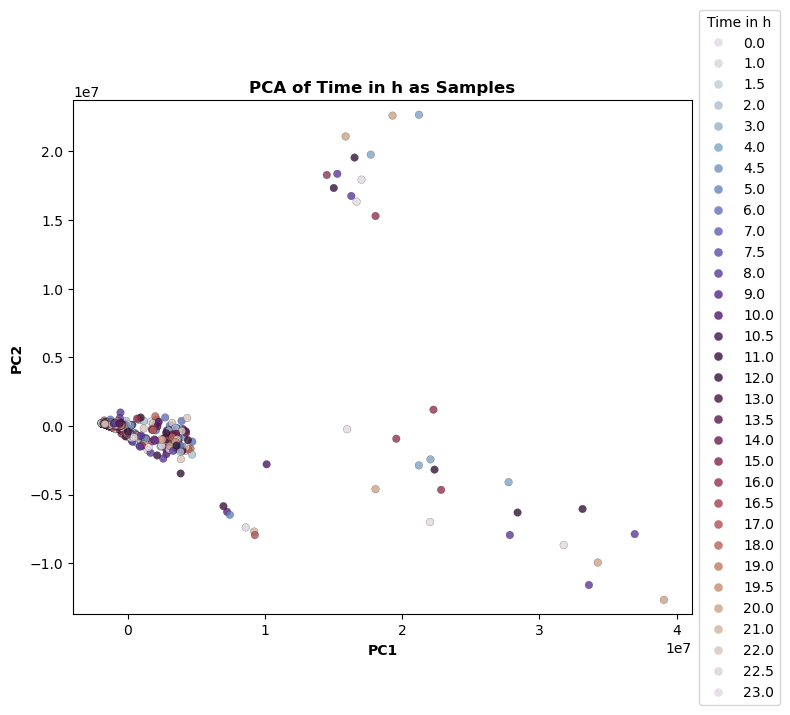

In [6]:
pc.principal_component_2d_timesample(data=not_norm_df, label='Time in h',c_map='twilight')

### PYDESEQ2 AS NORMALIZATION

In [7]:
pydese2_df = pd.DataFrame(data=adata.layers['deseq2_norm'], columns=adata.var.index, index=adata.obs['time'])

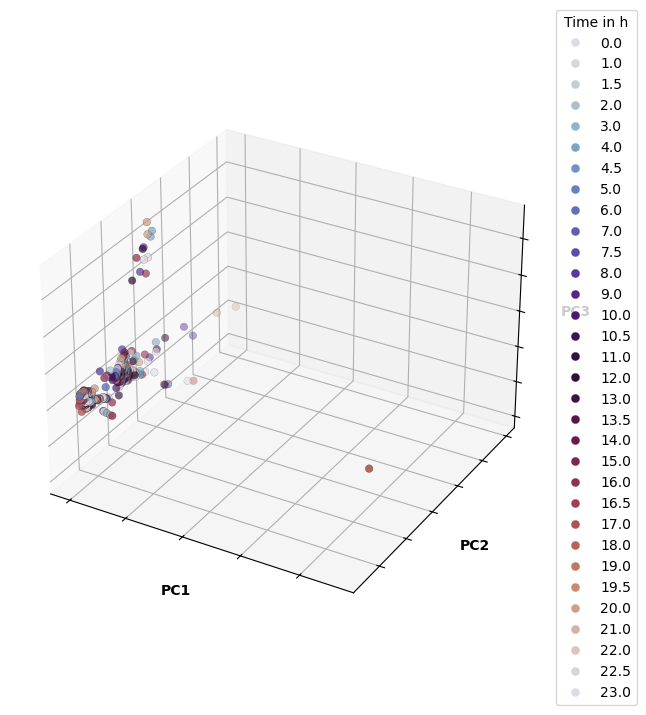

In [51]:
pc.principal_component_3d_timesample(data=pydese2_df, label='Time in h',c_map='twilight')

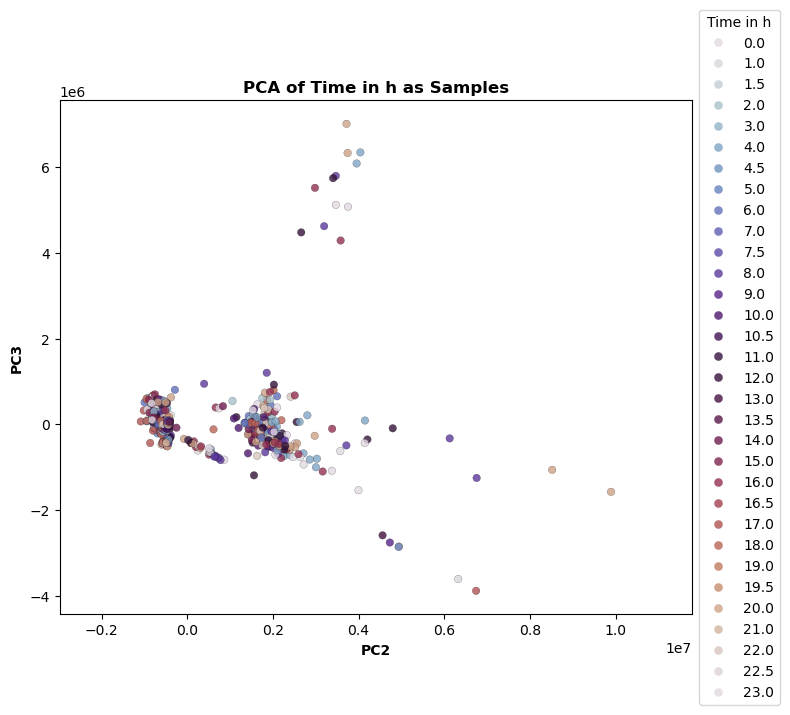

In [9]:
pc.principal_component_2d_timesample(data=pydese2_df, x=2, y=3, label='Time in h',c_map='twilight')

### TPM (NORMALIZATION BY RESEARCHERS) — FULL DATASET

In [10]:
adataZ_df = adata.to_df()

In [11]:
adataZ_df_time = adataZ_df.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time').sort_index(ascending=True)

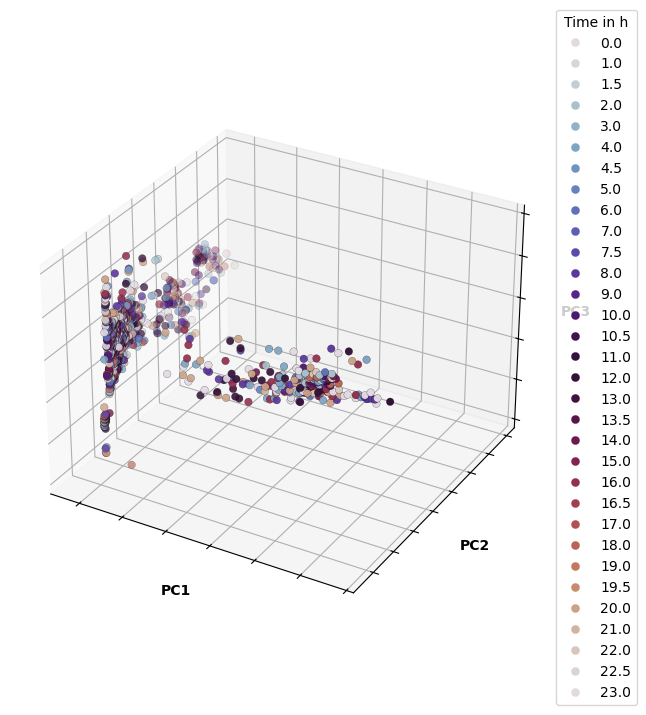

In [54]:
pc.principal_component_3d_timesample(data=adataZ_df_time, label='Time in h',c_map='twilight')

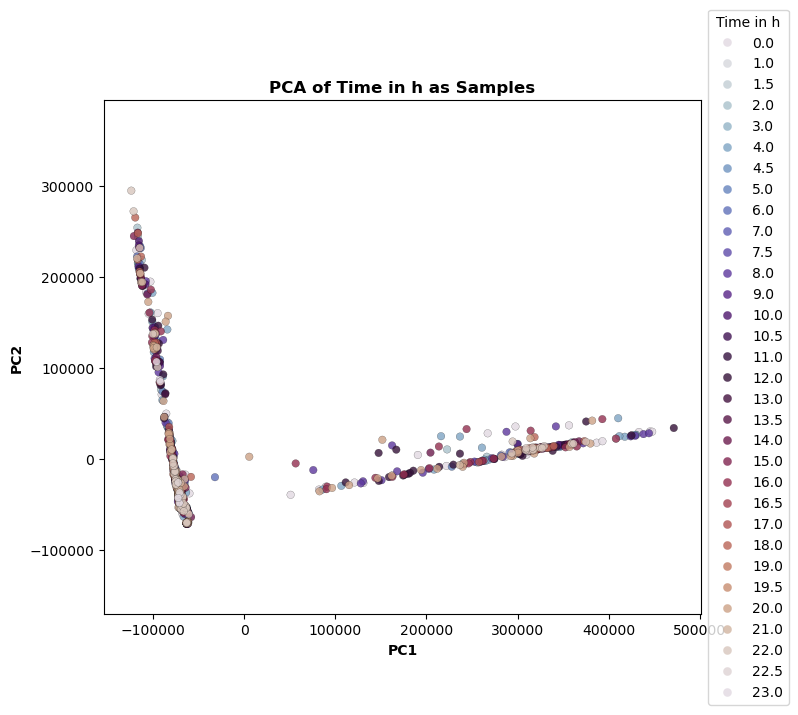

In [14]:
pc.principal_component_2d_timesample(data=adataZ_df_time, x=1, y=2, label='Time in h',c_map='twilight')

### LOG TRANSFORMED — FULL DATASET

#### TPM

In [55]:
adataX_df = adata.to_df(layer='log_trasformed')

In [56]:
adataX_df_time = adataX_df.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time').sort_index(ascending=True)

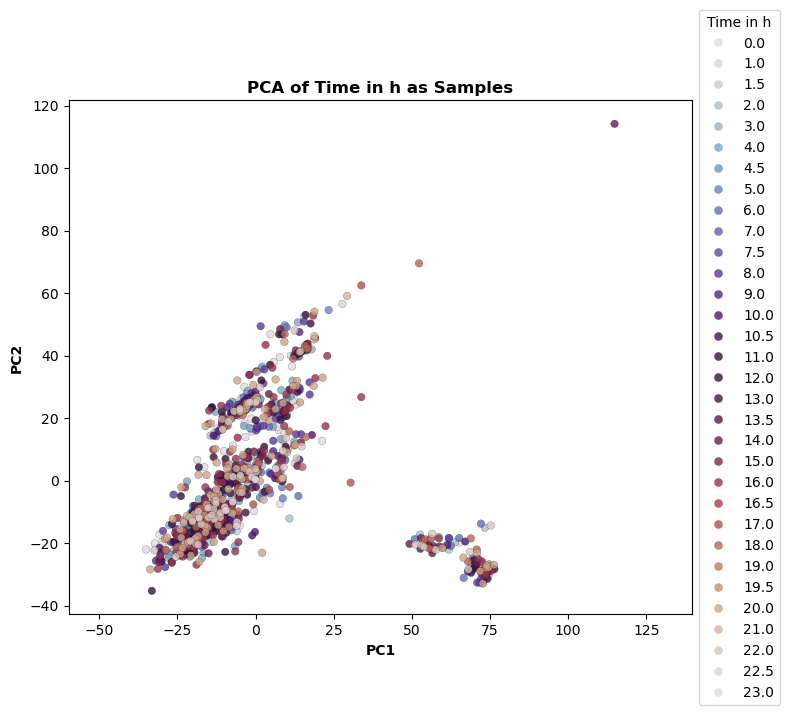

In [57]:
pc.principal_component_2d_timesample(data=adataX_df_time, label='Time in h', c_map='twilight')

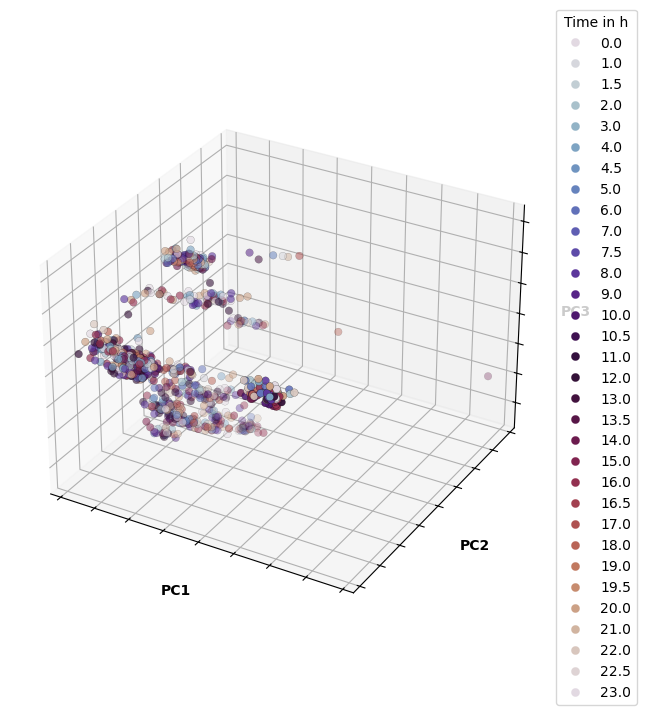

In [58]:
pc.principal_component_3d_timesample(data=adataX_df_time, label='Time in h', c_map='twilight')

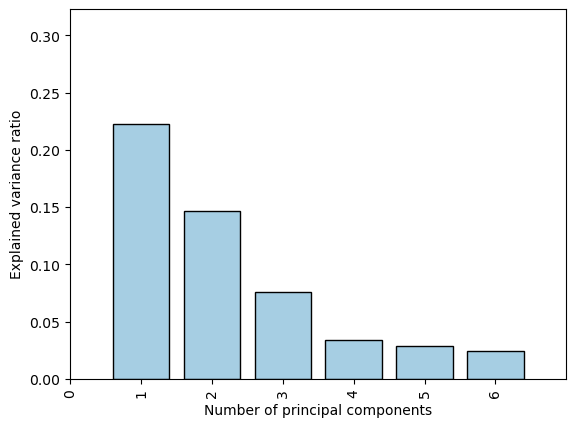

In [59]:
pc.variance_ratio(data=adataX_df_time, n=6)

#### DESEQ2

In [60]:
pydese2_df = pd.DataFrame(data=adata.layers['log_trasformed_deseq2'], columns=adata.var.index, index=adata.obs['time'])

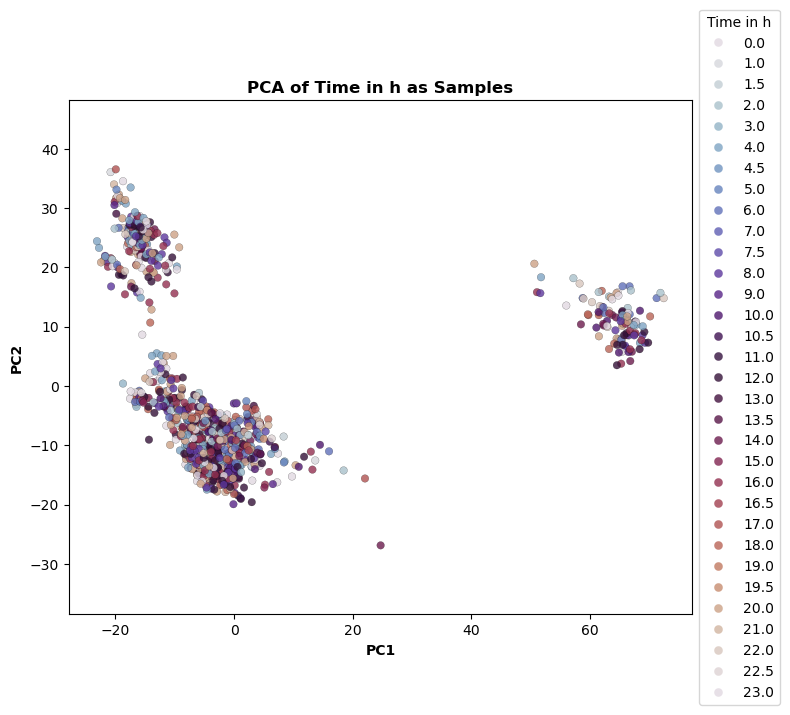

In [61]:
pc.principal_component_2d_timesample(data=pydese2_df, label='Time in h', c_map='twilight')

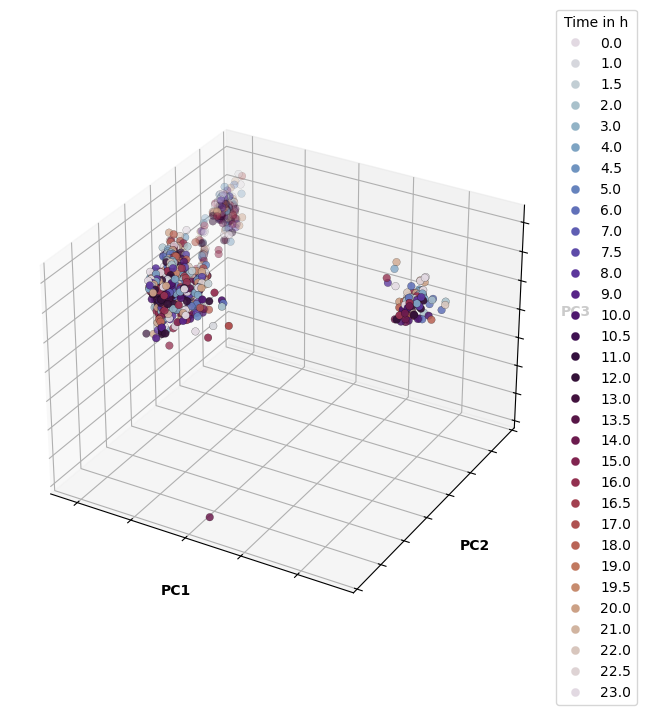

In [62]:
pc.principal_component_3d_timesample(data=pydese2_df, label='Time in h', c_map='twilight')

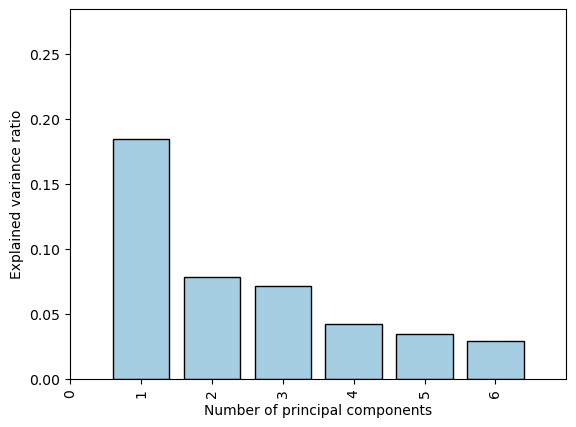

In [63]:
pc.variance_ratio(data=pydese2_df, n=6)

### SEQUENCING TYPE

In [64]:
pydese2_df_st = pd.DataFrame(data=adata.layers['log_trasformed_deseq2'], columns=adata.var.index, index=adata.obs['Sequencing Type'])

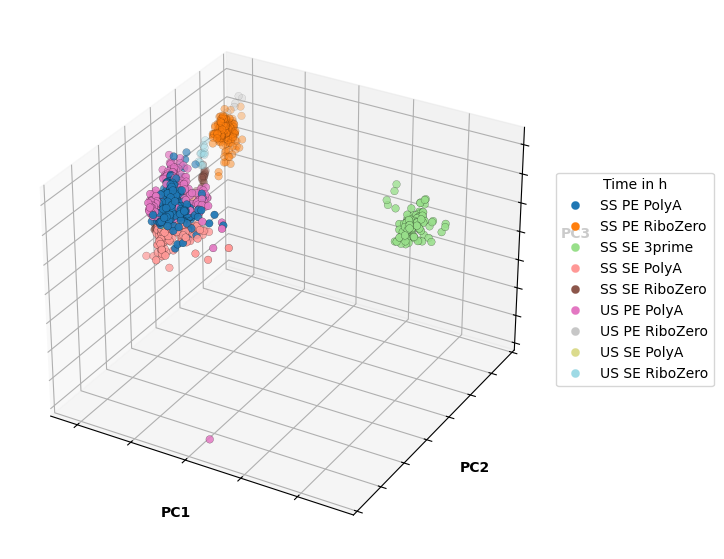

In [65]:
pc.principal_component_3d_timesample(data=pydese2_df_st, label='Time in h')

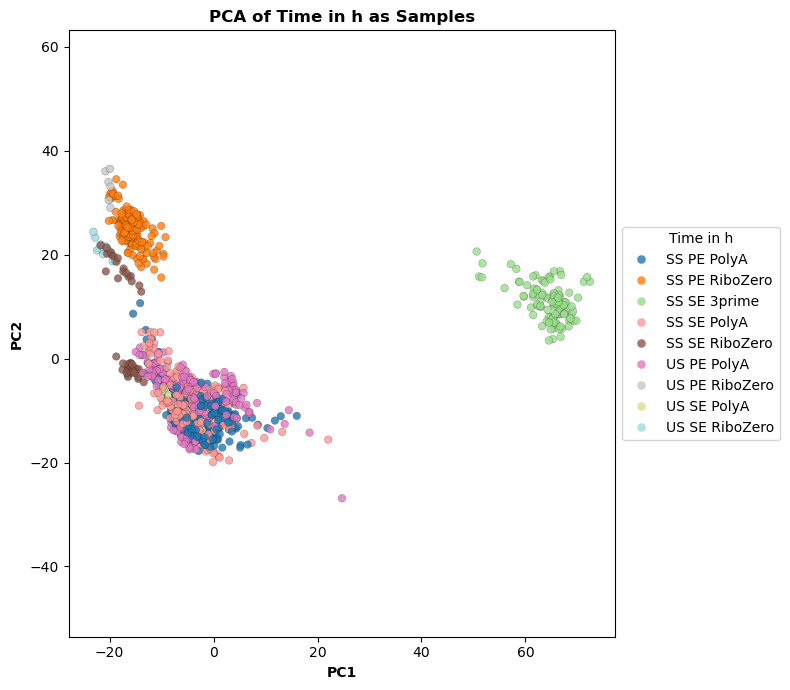

In [66]:
pc.principal_component_2d_timesample(data=pydese2_df_st, label='Time in h')

### LOG TRANSFORMED — REDUCED TPM DATASET

In [15]:
sr_df = adata.obsm['small_reduction']

In [16]:
sr_df

,ENSMUSG00000085087,ENSMUSG00000091192,ENSMUSG00000085767,ENSMUSG00000087612,ENSMUSG00000075514,ENSMUSG00000086657,ENSMUSG00000086728,ENSMUSG00000086914,ENSMUSG00000089810,ENSMUSG00000097320,...,ENSMUSG00000000628,ENSMUSG00000021643,ENSMUSG00000099242,ENSMUSG00000099055,ENSMUSG00000098330,ENSMUSG00000051359,ENSMUSG00000031901,ENSMUSG00000115219,ENSMUSG00000024810,ENSMUSG00000063488
GSM2046160,-0.545788,0.937406,-0.315297,-0.619013,-0.080956,-0.282838,-0.003499,0.543496,0.370646,0.220647,...,-0.275400,0.630852,0.175776,-0.268181,0.455060,0.501454,0.541233,0.690898,-0.163685,0.445732
GSM2046184,-0.487130,0.667442,-0.230428,-0.656333,-0.362965,-0.476121,0.089202,0.419574,0.333314,0.193267,...,-0.179679,0.540005,0.126407,-0.435433,0.992064,0.424893,0.458435,0.681629,-0.106464,0.362831
GSM2046157,-0.460668,0.921573,-0.401685,-0.610949,0.136146,-0.349809,0.176679,0.776022,0.440517,0.162355,...,-0.347652,0.654206,0.252465,-0.480764,0.768665,0.332380,0.259130,0.595821,-0.206252,0.425347
GSM2046183,-0.512794,0.929537,-0.286127,-0.266617,-0.093615,-0.460284,0.004868,0.478227,0.389384,0.179879,...,-0.447147,0.580705,0.121603,-0.435824,0.976180,0.221078,0.311116,0.658077,-0.297084,0.411055
GSM2046155,-0.589398,1.062051,-0.121422,-0.414218,-0.127357,-0.237796,0.017936,0.400768,0.374046,0.187921,...,-0.437495,0.565282,0.209472,-0.282652,1.245999,0.419997,0.476968,0.696996,-0.330460,0.448777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6610738,-1.000000,-1.000000,-0.209182,0.323120,0.358388,-0.195959,0.324243,0.985373,0.877894,0.388948,...,-0.151879,1.093968,-0.184683,-0.370062,1.299305,0.239795,0.533919,0.951358,-0.048499,0.291353
GSM6610724,-0.042687,-1.000000,-0.233743,0.464642,0.358141,-0.121164,0.266549,0.986062,0.760175,0.394898,...,-0.404560,1.079774,0.450712,0.067632,0.497746,0.615966,0.634586,0.928355,-0.069346,0.257472
GSM6610752,-0.261752,-1.000000,-0.131301,0.301870,0.164528,-0.058650,0.223405,0.973539,0.670866,0.312856,...,-0.474896,1.090374,-0.084305,-0.504261,0.485284,0.696351,0.693668,0.948678,-0.047645,0.448722
GSM6610726,0.108785,0.227462,-0.132743,0.417752,0.332091,-0.253370,0.283457,1.005009,0.844726,0.459736,...,-0.361455,0.944219,0.452427,0.174249,1.077564,0.634148,0.624691,0.858791,-0.088479,0.247423


In [68]:
sr_df_time = sr_df.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time').sort_index(ascending=True)

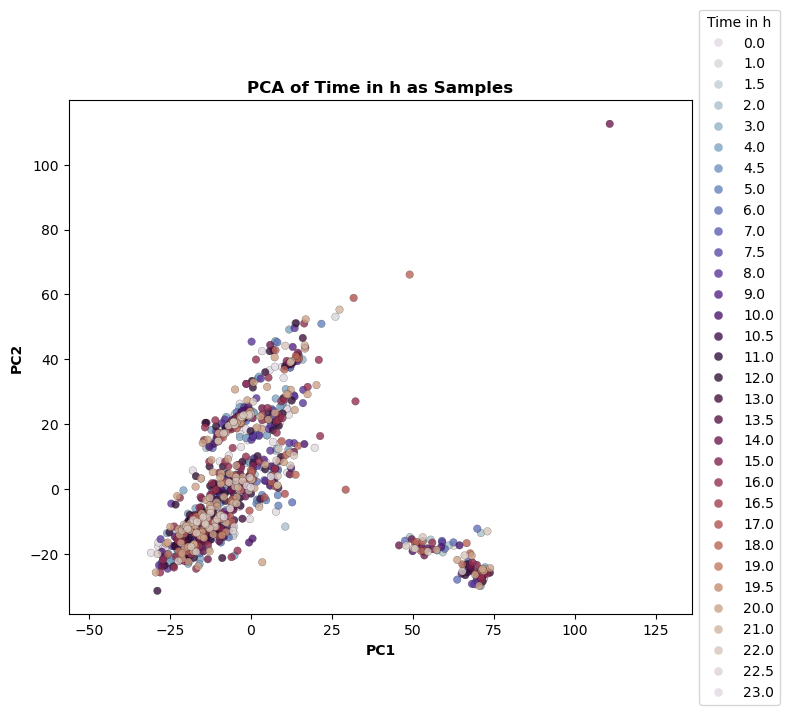

In [69]:
pc.principal_component_2d_timesample(data=sr_df_time, label='Time in h', c_map='twilight')

#### STUDY

In [23]:
sr_df_study = sr_df.join(adata.obs['study']).reset_index().drop('index', axis=1).set_index('study')

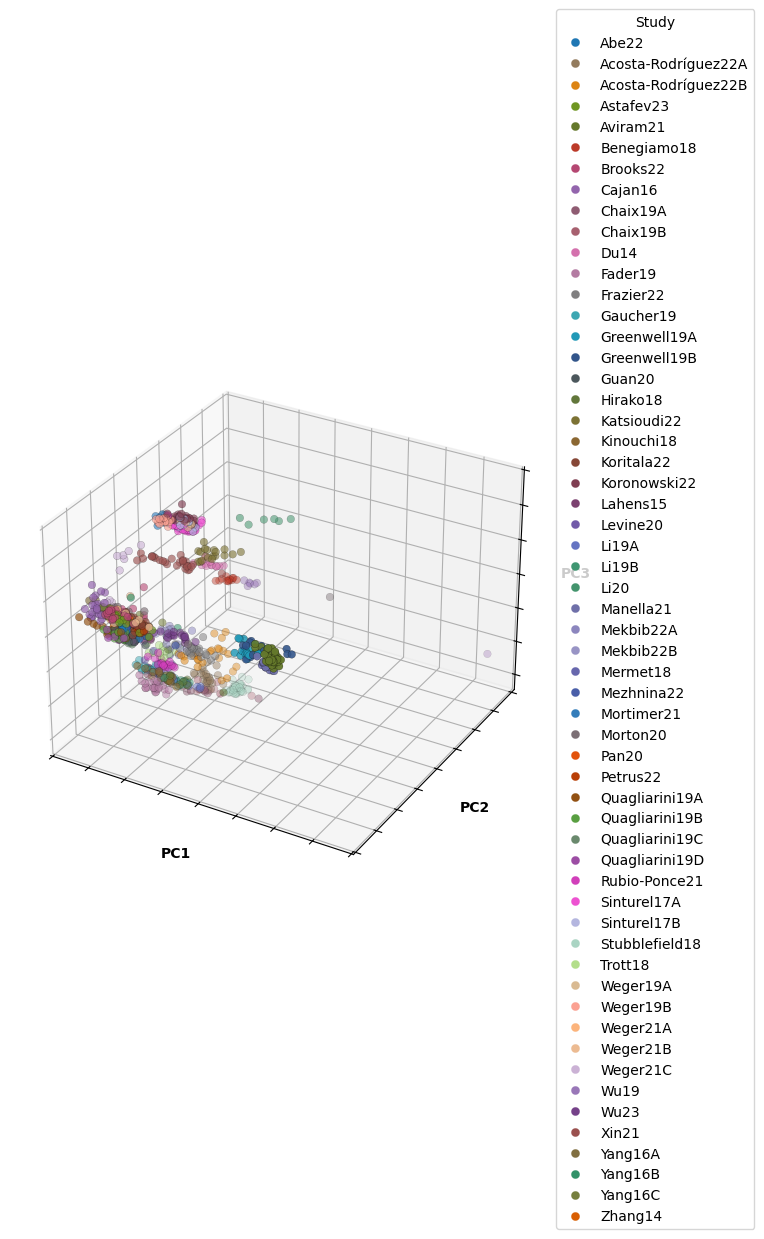

In [71]:
pc.principal_component_3d_timesample(data=sr_df_study, label='Study',c_map=cc.custom_cmap_func('c_34'))

/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/PCA_func.py:130: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


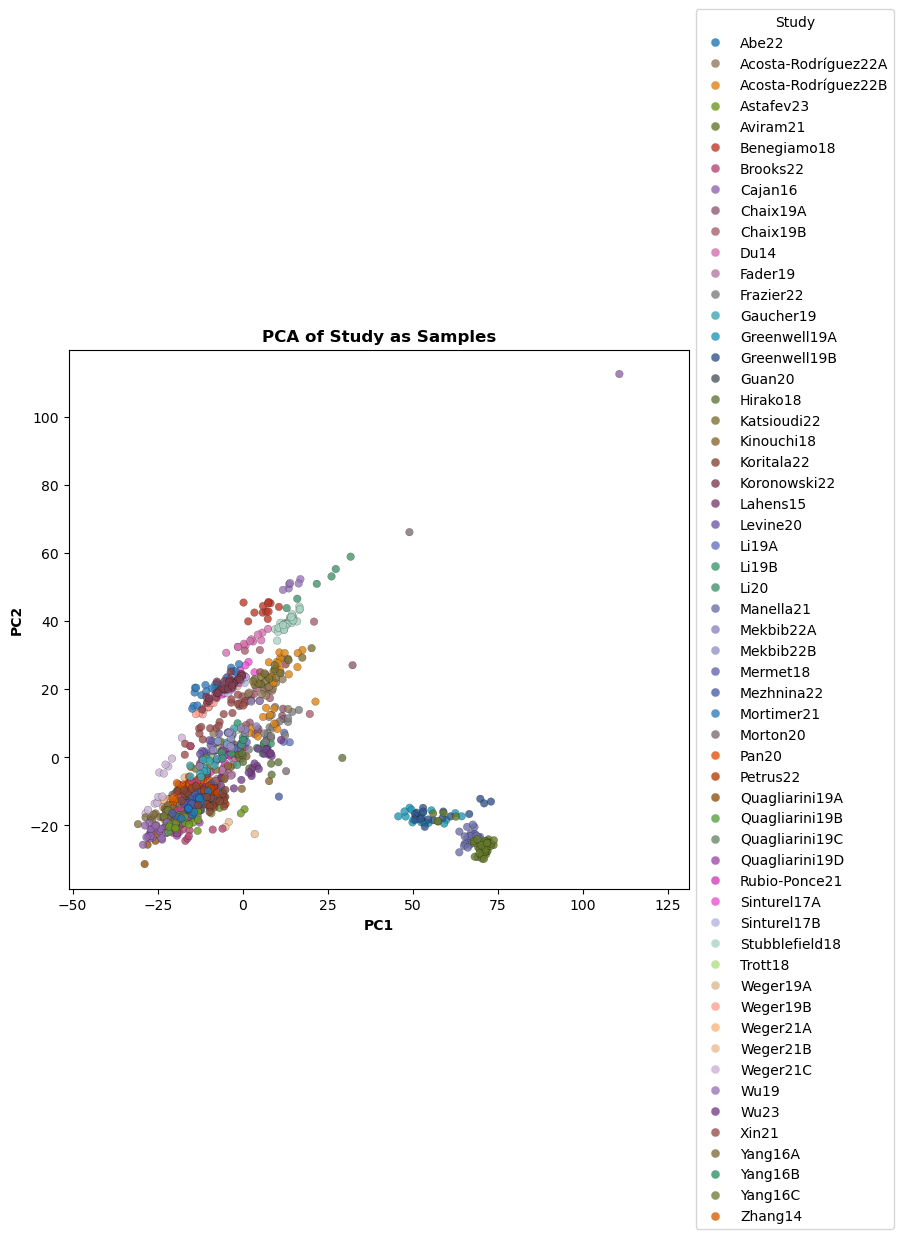

In [24]:
pc.principal_component_2d_timesample(data=sr_df_study, label='Study',c_map=cc.custom_cmap_func('c_34'))

#### SEX

In [17]:
sr_df_sex = sr_df.join(adata.obs['Sex']).reset_index().drop('index', axis=1).set_index('Sex')

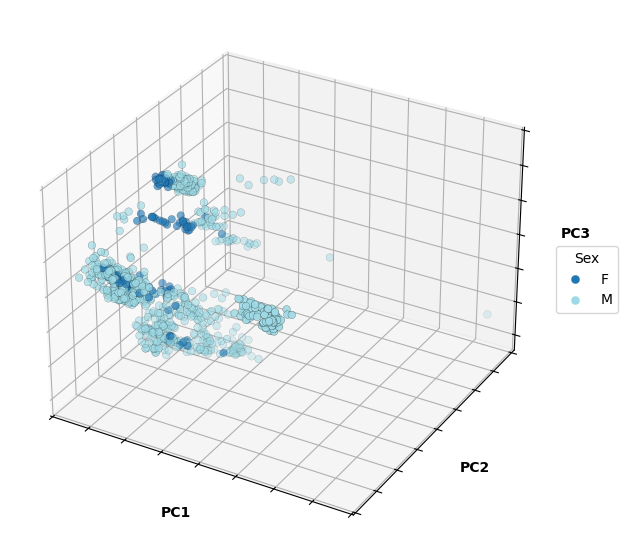

In [73]:
pc.principal_component_3d_timesample(data=sr_df_sex, label='Sex',c_map='tab20')

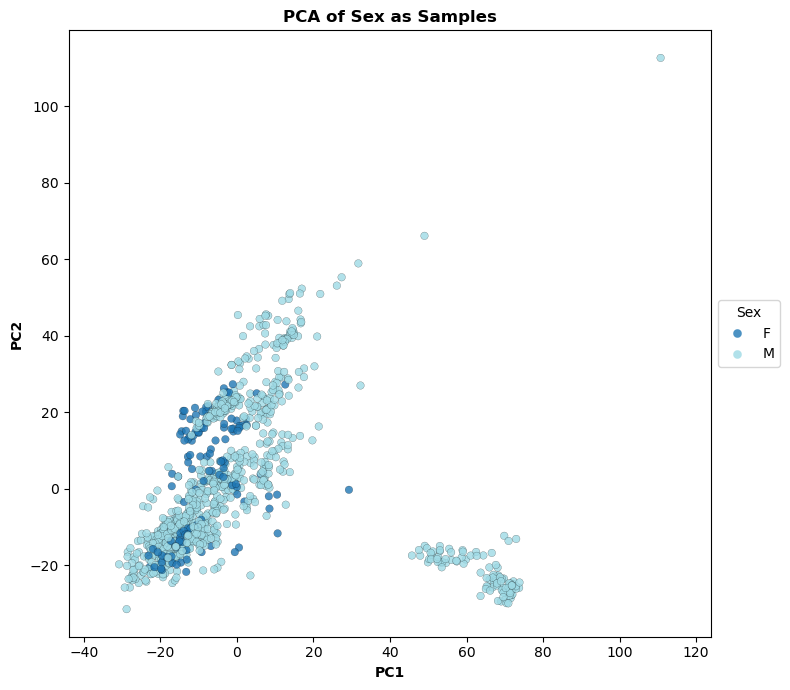

In [18]:
pc.principal_component_2d_timesample(data=sr_df_sex, label='Sex',c_map='tab20')

#### LIGHT

In [19]:
sr_df_light = sr_df.join(adata.obs['Light']).reset_index().drop('index', axis=1).set_index('Light')

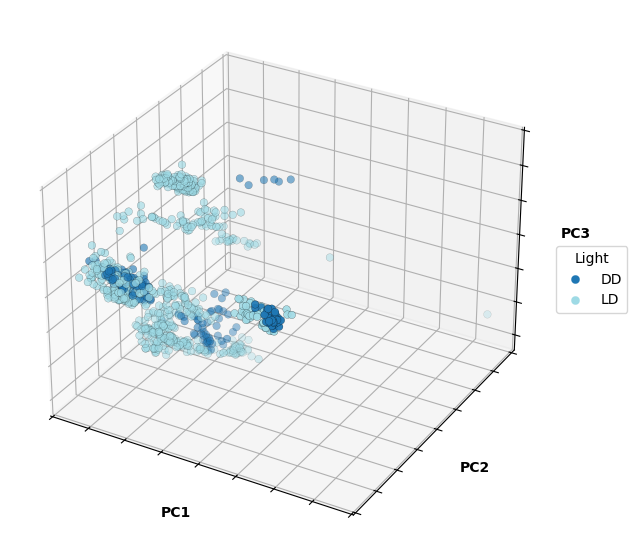

In [75]:
pc.principal_component_3d_timesample(data=sr_df_light, label='Light',c_map='tab20')

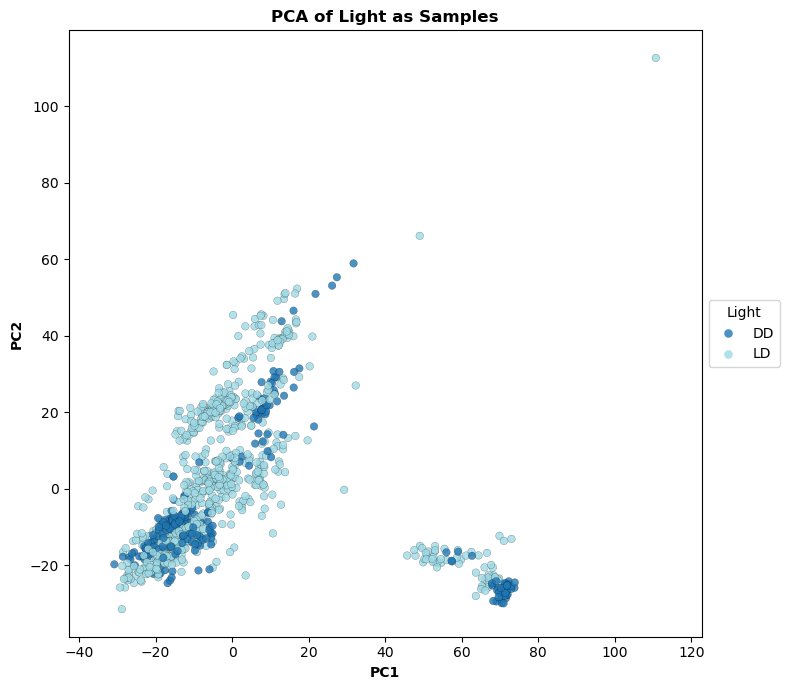

In [20]:
pc.principal_component_2d_timesample(data=sr_df_light, label='Light',c_map='tab20')

#### AGE

In [21]:
sr_df_age = sr_df.join(adata.obs['Age (weeks)']).reset_index().drop('index', axis=1).set_index('Age (weeks)')

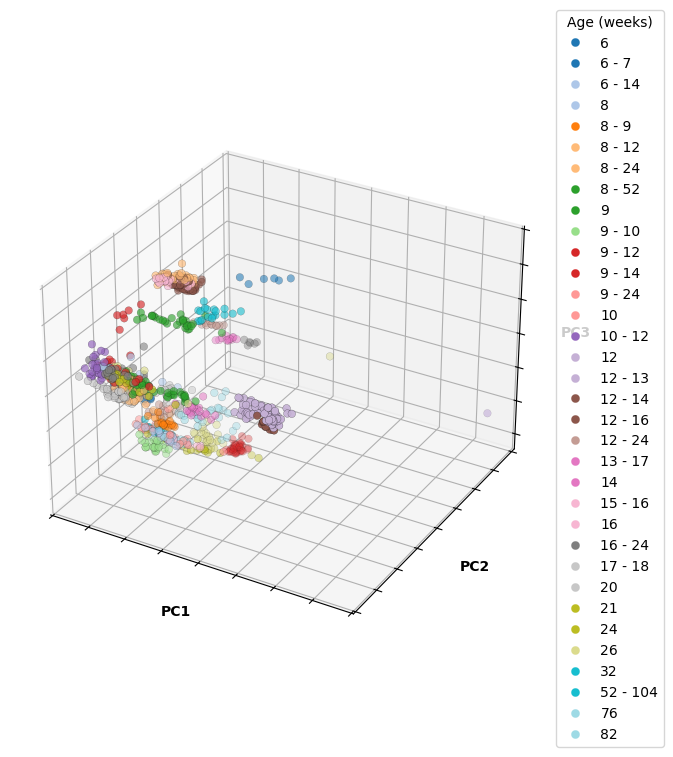

In [77]:
pc.principal_component_3d_timesample(data=sr_df_age, label='Age (weeks)',c_map='tab20')

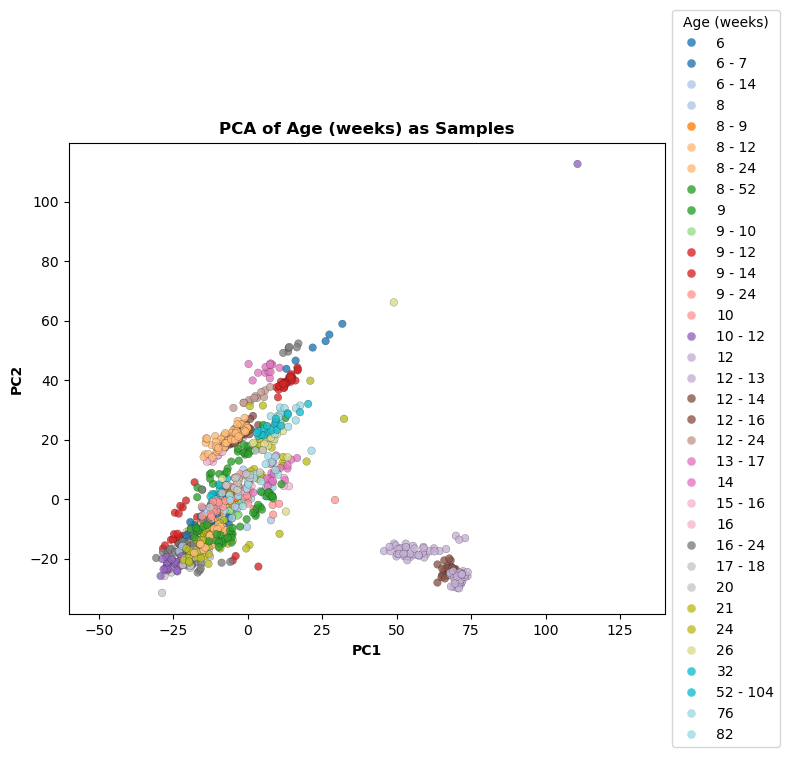

In [22]:
pc.principal_component_2d_timesample(data=sr_df_age, label='Age (weeks)',c_map='tab20')

### SEQUENCING TYPE

In [78]:
sr_df_st = sr_df.join(adata.obs['Sequencing Type']).reset_index().drop('index', axis=1).set_index('Sequencing Type')

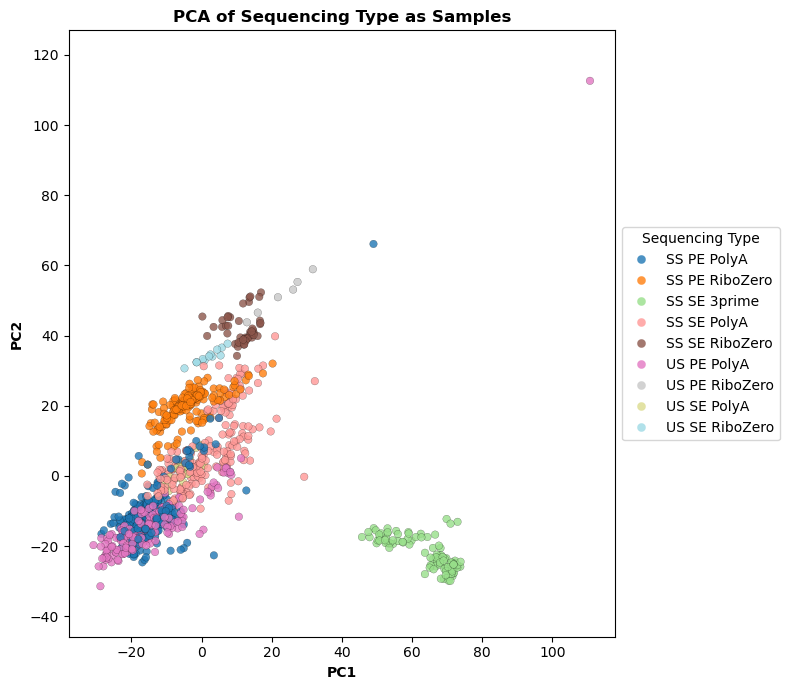

In [79]:
pc.principal_component_2d_timesample(data=sr_df_st, label='Sequencing Type',c_map='tab20')

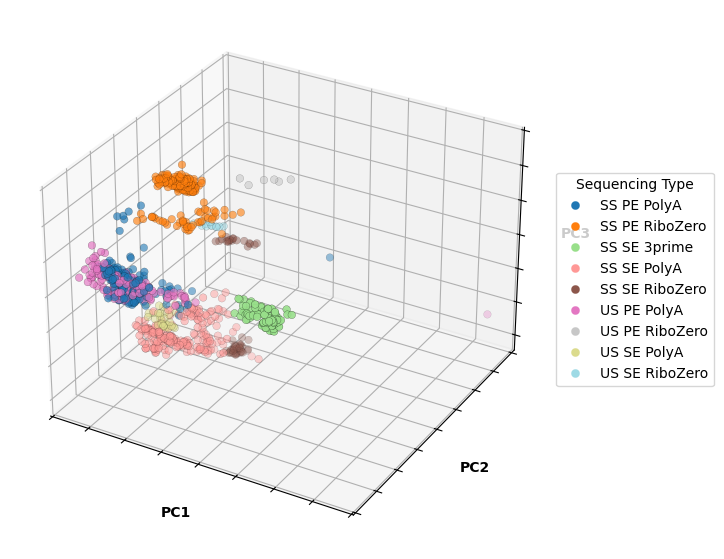

In [80]:
pc.principal_component_3d_timesample(data=sr_df_st, label='Sequencing Type',c_map='tab20')

### NOTES

In [81]:
sr_df_note = sr_df.join(adata.obs['Note']).reset_index().drop('index', axis=1).set_index('Note')

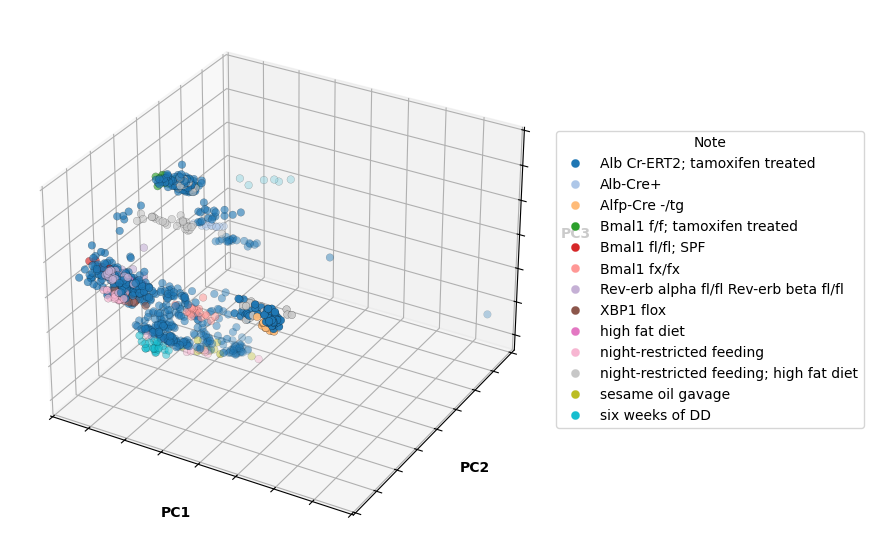

In [82]:
pc.principal_component_3d_timesample(data=sr_df_note, label='Note',c_map='tab20')